#### Import the required libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import tree

#### Read the data from CSV

In [5]:
dummy_df= pd.read_csv('Heart_Dataset.csv')
dummy_df.head()

,age,sex,chestPainType,restingBloodPressure,serumCholestoralmg/dl,fastingBloodSugar>true2falsemg/dl,RestingElectrocardiographicResults,maximumHeartRate,exerciseInducedAgngina,oldpeak=Stdepression,slopePeakExerciseSTsegment,majorColoredVessels,thal,HeartDisease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


## EDA 

In [6]:
# number of columns and rows
dummy_df.shape

(270, 14)

In [7]:
columns_names = dummy_df.columns.values
columns_names

array(['age', 'sex', 'chestPainType', 'restingBloodPressure',
       'serumCholestoralmg/dl', 'fastingBloodSugar>true2falsemg/dl',
       'RestingElectrocardiographicResults', 'maximumHeartRate',
       'exerciseInducedAgngina', 'oldpeak=Stdepression',
       'slopePeakExerciseSTsegment', 'majorColoredVessels', 'thal',
       'HeartDisease'], dtype=object)

In [8]:
# getting information about the dataset
dummy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   age                                 270 non-null    int64  
 1   sex                                 270 non-null    int64  
 2   chestPainType                       270 non-null    int64  
 3   restingBloodPressure                270 non-null    int64  
 4   serumCholestoralmg/dl               270 non-null    int64  
 5   fastingBloodSugar>true2falsemg/dl   270 non-null    int64  
 6   RestingElectrocardiographicResults  270 non-null    int64  
 7   maximumHeartRate                    270 non-null    int64  
 8   exerciseInducedAgngina              270 non-null    int64  
 9   oldpeak=Stdepression                270 non-null    float64
 10  slopePeakExerciseSTsegment          270 non-null    int64  
 11  majorColoredVessels                 270 non-n

In [9]:
# finding missing values
dummy_df.isnull().sum()

age                                   0
sex                                   0
chestPainType                         0
restingBloodPressure                  0
serumCholestoralmg/dl                 0
fastingBloodSugar>true2falsemg/dl     0
RestingElectrocardiographicResults    0
maximumHeartRate                      0
exerciseInducedAgngina                0
oldpeak=Stdepression                  0
slopePeakExerciseSTsegment            0
majorColoredVessels                   0
thal                                  0
HeartDisease                          0
dtype: int64

<Axes: >

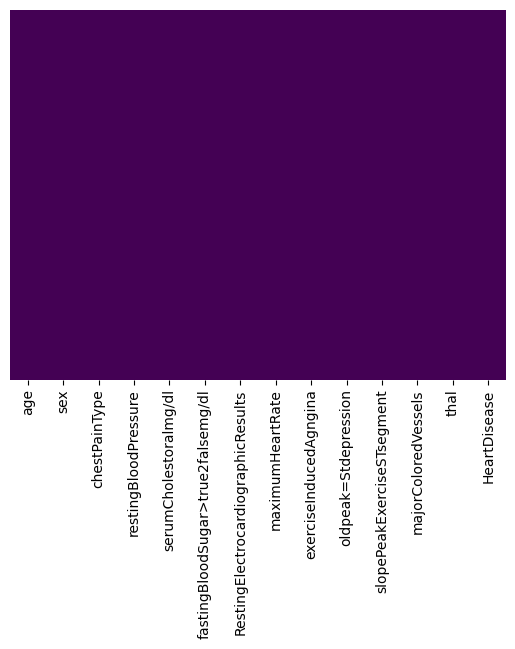

In [10]:
# plotting a heatmap for null values in our case since we don't have any null values can't see any thing
sns.heatmap(dummy_df.isnull(),yticklabels =False, cbar=False, cmap='viridis')

## UniVariant Analysis

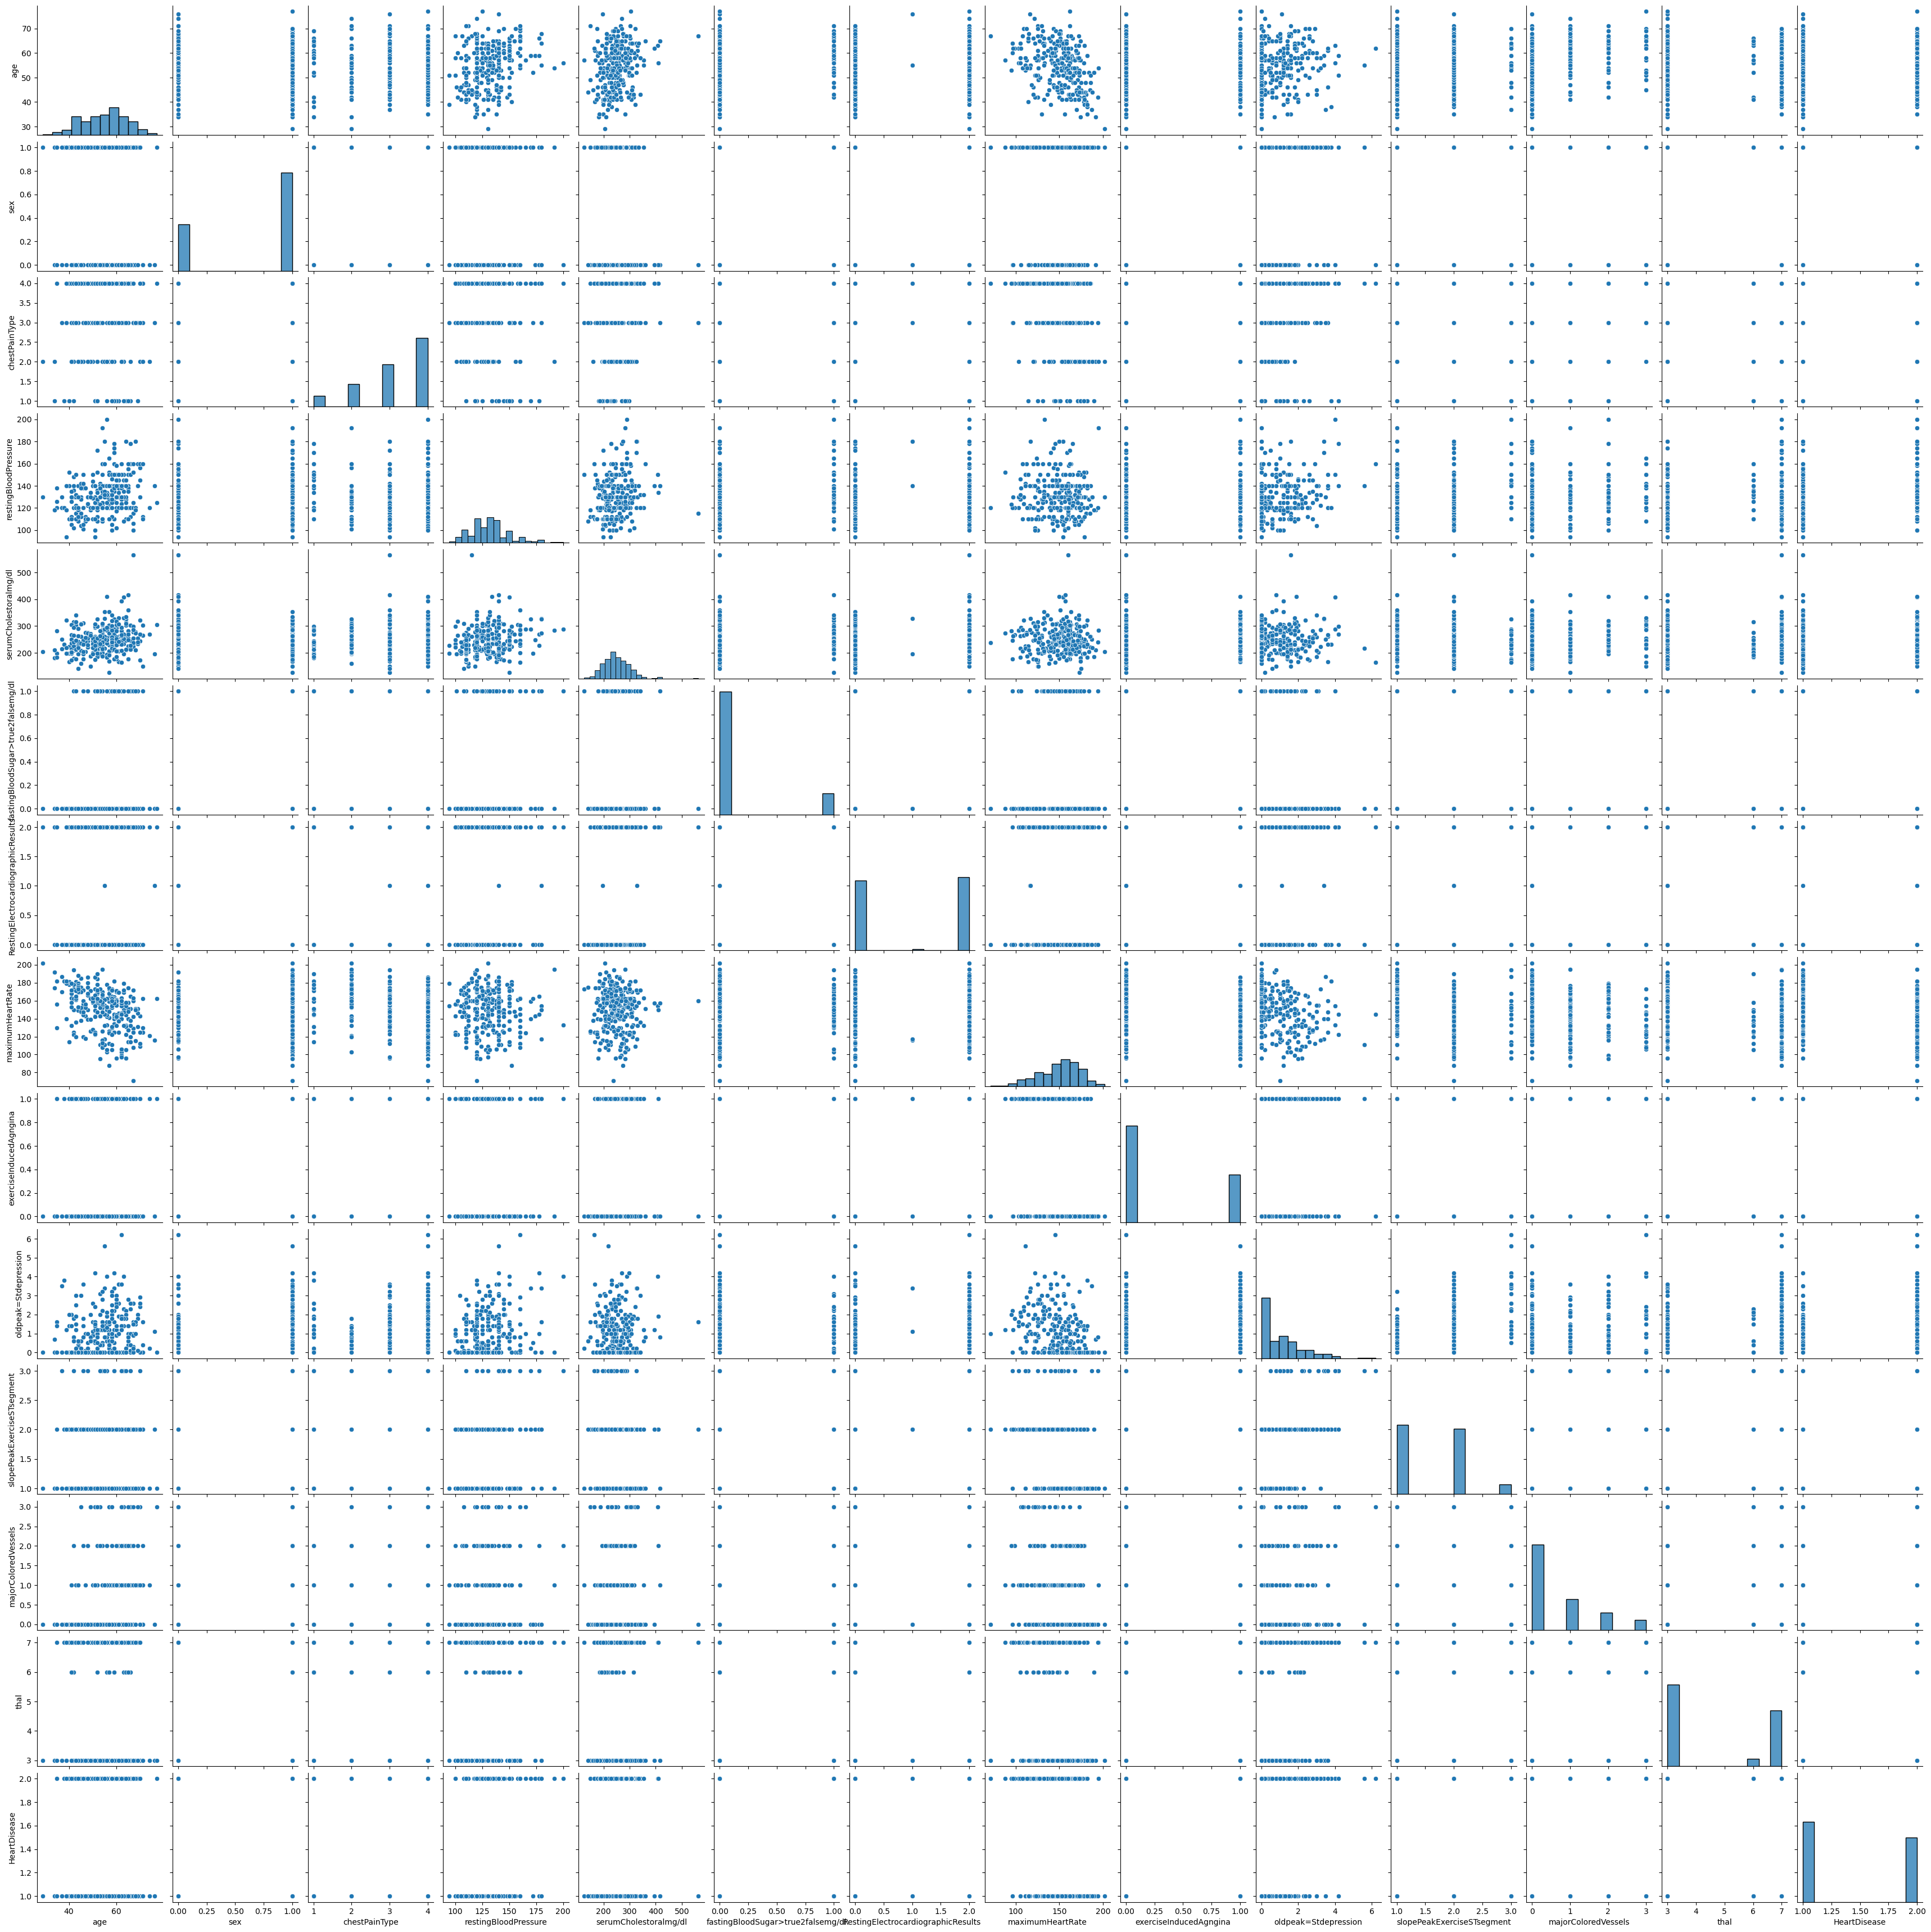

In [11]:
sns.pairplot(data=dummy_df)
plt.show()

Text(0, 0.5, 'number of patients')

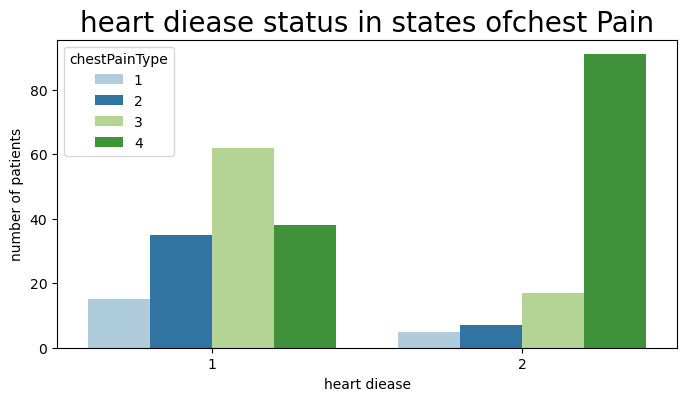

In [13]:
plt.figure(figsize = (8,4))
ax1 = sns.countplot(x='HeartDisease', hue='chestPainType',data=dummy_df, palette = 'Paired')
# lengend_lebels,_ = ax1.get_legend_handles_labels()
# ax1.legend(bbox_to_anchor(1,1))
plt.title('heart diease status in states ofchest Pain' , size=20)
plt.xlabel('heart diease')
plt.ylabel('number of patients')


Text(0, 0.5, 'number of patients')

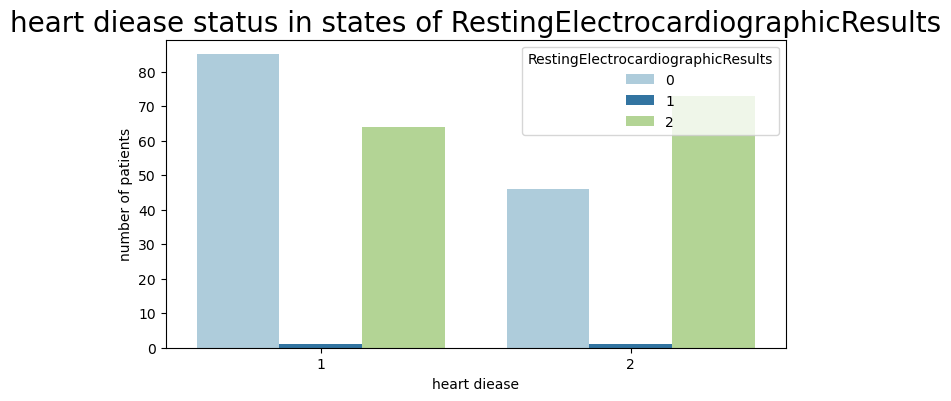

In [14]:
plt.figure(figsize = (8,4))
ax1 = sns.countplot(x='HeartDisease', hue='RestingElectrocardiographicResults',data=dummy_df, palette = 'Paired')
# lengend_lebels,_ = ax1.get_legend_handles_labels()
# ax1.legend(bbox_to_anchor(1,1))
plt.title('heart diease status in states of RestingElectrocardiographicResults' , size=20)
plt.xlabel('heart diease')
plt.ylabel('number of patients')


Text(0, 0.5, 'number of patients')

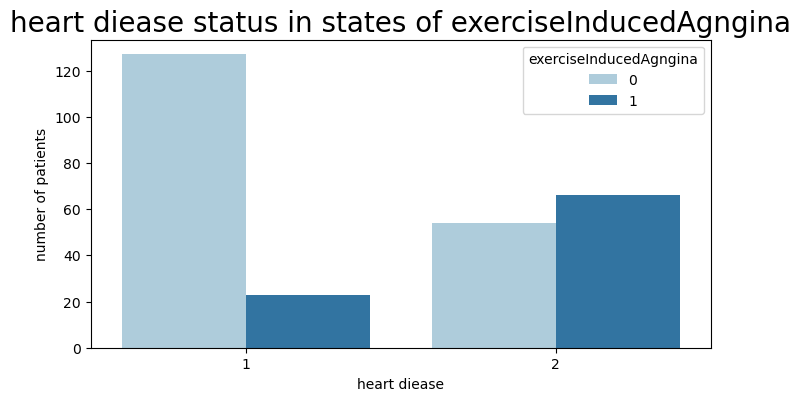

In [50]:

plt.figure(figsize = (8,4))
ax1 = sns.countplot(x='HeartDisease', hue='exerciseInducedAgngina',data=dummy_df, palette = 'Paired')
# lengend_lebels,_ = ax1.get_legend_handles_labels()
# ax1.legend(bbox_to_anchor(1,1))
plt.title('heart diease status in states of exerciseInducedAgngina' , size=20)
plt.xlabel('heart diease')
plt.ylabel('number of patients')

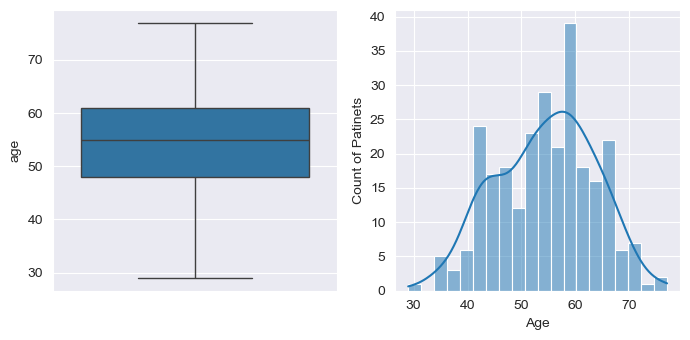

In [77]:

f, axes = plt.subplots(1, 2)
sns.boxplot(dummy_df.age, ax=axes[0])



sns.set_style('darkgrid')
sns.histplot(dummy_df.age,bins=20, kde=True, ax=axes[1])
plt.xlabel("Age")
plt.ylabel("Count of Patinets")



plt.show()

## Data Pre-Processing

In [4]:
contact_df = dummy_df

In [5]:
# creating preprocessing function
def preprocessor(df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    res_df['chestPainType'] = le.fit_transform(res_df['chestPainType'])
    res_df['RestingElectrocardiographicResults'] = le.fit_transform(res_df['RestingElectrocardiographicResults'])
    res_df['slopePeakExerciseSTsegment'] = le.fit_transform(res_df['slopePeakExerciseSTsegment'])
    res_df['majorColoredVessels'] = le.fit_transform(res_df['majorColoredVessels'])
    res_df['thal'] = le.fit_transform(res_df['thal'])
    res_df['HeartDisease'] = le.fit_transform(res_df['HeartDisease'])
    return res_df
    

In [6]:
# getting preprocessed data from the above function
encoded_df = preprocessor(contact_df)

# separating independent features
x= encoded_df.drop(['HeartDisease'],axis = 1).values

# separating class labels
y= encoded_df['HeartDisease'].values

0    0.555556
1    0.444444
Name: HeartDisease, dtype: float64


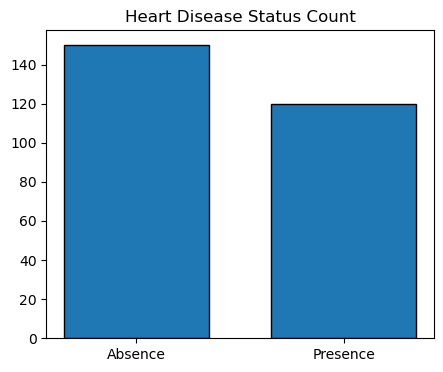

In [7]:
# 0== Absence , 1 == Presence
Yes_Disease = encoded_df['HeartDisease'].value_counts(normalize = True)
print(Yes_Disease)

plt.figure(figsize=(5,4))
plt.title('Heart Disease Status Count')
plt.bar(['Absence','Presence'],encoded_df['HeartDisease'].value_counts(), edgecolor = 'k', width = 0.7)
plt.show()

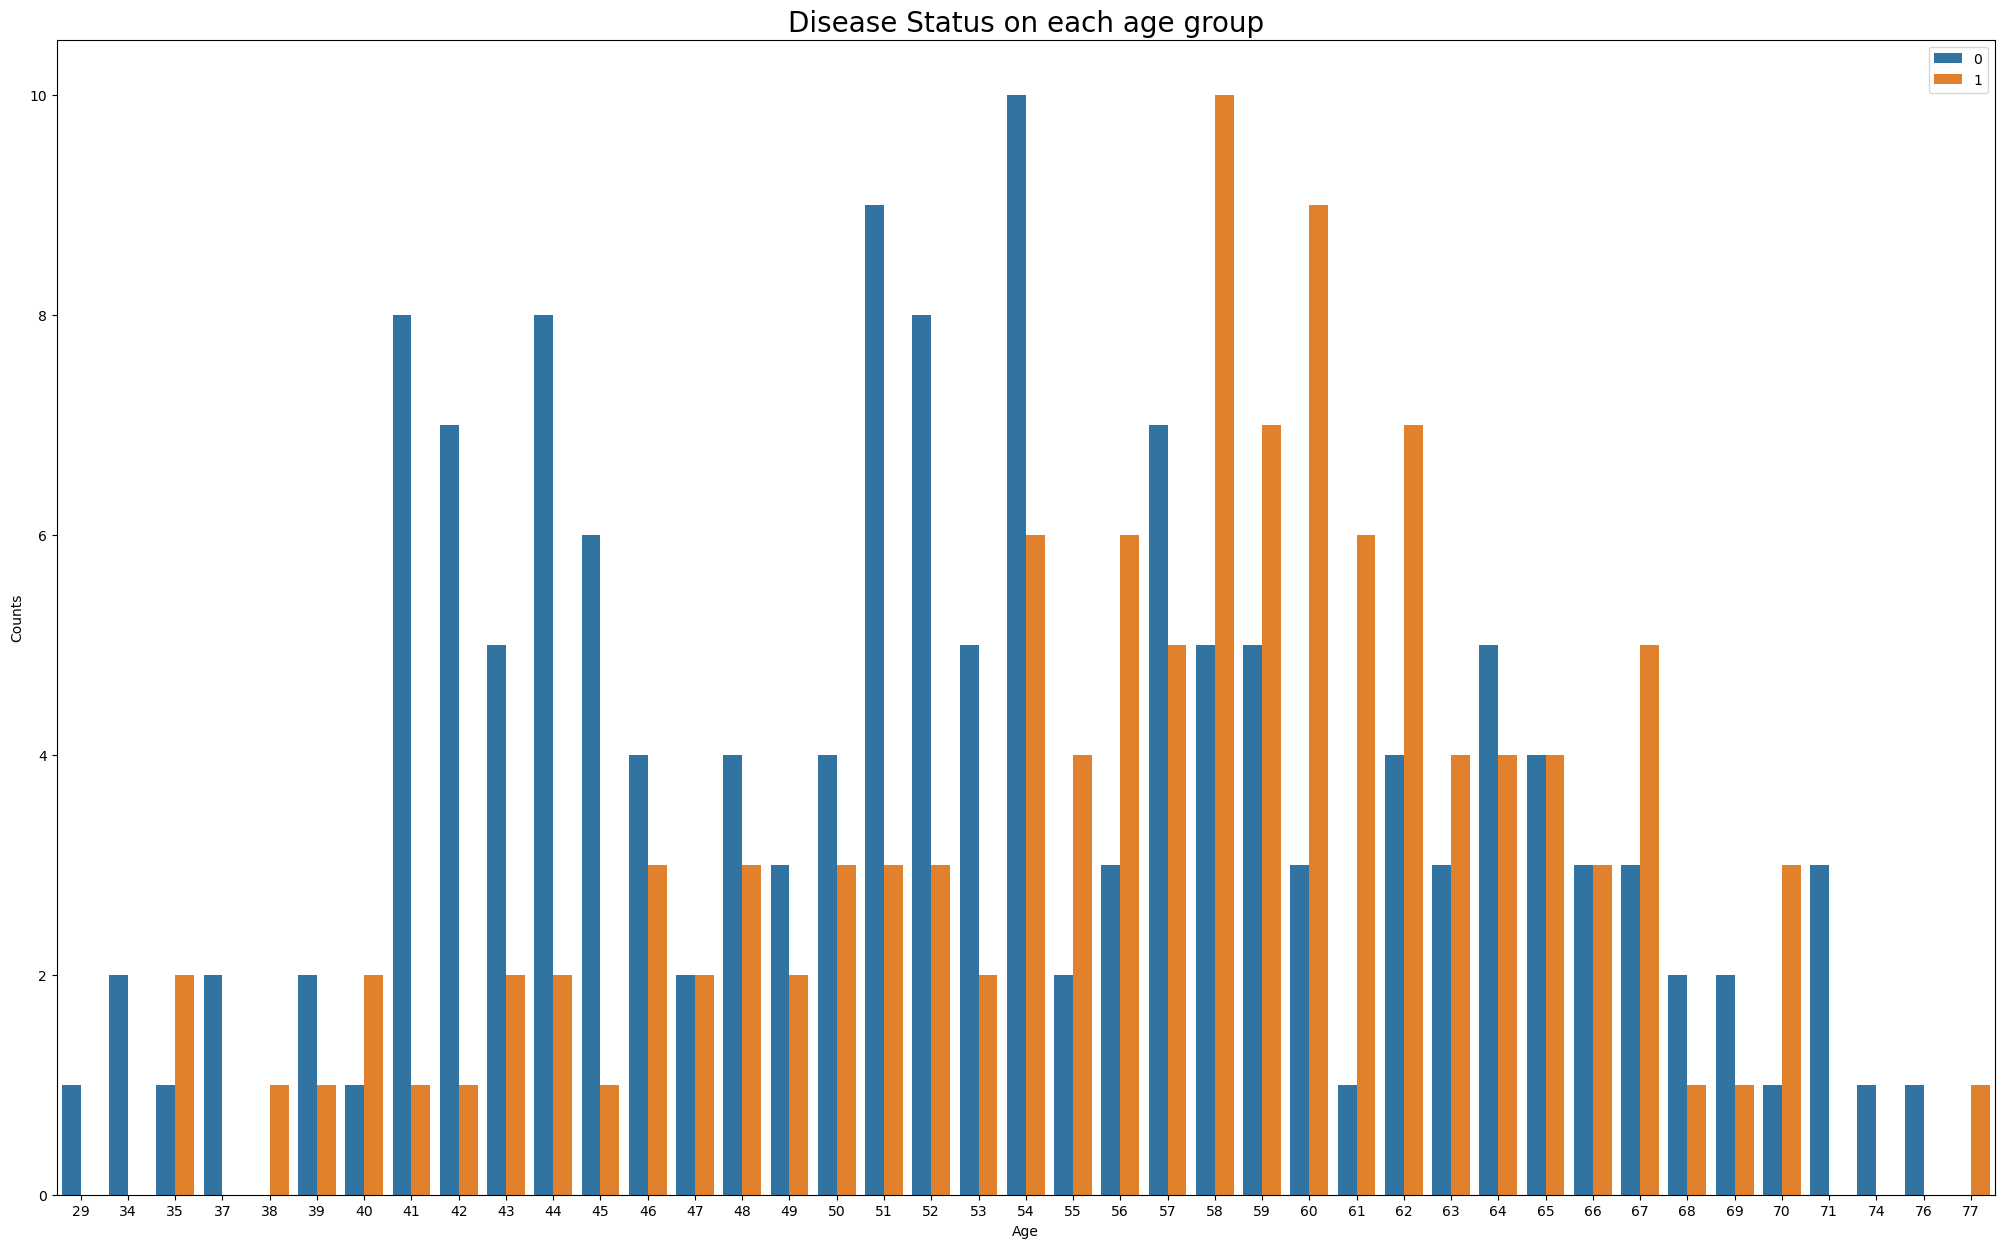

In [16]:
plt.figure(figsize=(25,15))
ax1 = sns.countplot(x='age', hue='HeartDisease', data=encoded_df )
legend_labels,_ = ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1,1))
plt.xlabel('Age')
plt.ylabel('Counts')
plt.title('Disease Status on each age group', size = 20)
# plt.legend(loc='lower right')
plt.show()

In [17]:
encoded_df.describe()

,age,sex,chestPainType,restingBloodPressure,serumCholestoralmg/dl,fastingBloodSugar>true2falsemg/dl,RestingElectrocardiographicResults,maximumHeartRate,exerciseInducedAgngina,oldpeak=Stdepression,slopePeakExerciseSTsegment,majorColoredVessels,thal,HeartDisease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,2.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,0.585185,0.670370,0.822222,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,0.959140,0.497827
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,2.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,2.000000,3.000000,2.000000,1.000000


## Split the data into Train-Test

In [57]:
#splitting the dataset into training and test   
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# Build Decision Tree Model

In [58]:
# decision tree with depth = 2
# applying decision tree algorithm
model_dt_2 = DecisionTreeClassifier(random_state=1, max_depth=2)
model_dt_2.fit(x_train,y_train)

# getting accuray for train dataset
model_dt_2_score_train = model_dt_2.score(x_train,y_train)
print("training score: ", model_dt_2_score_train)

# getting accuray for test dataset
model_dt_2_score_test = model_dt_2.score(x_test,y_test)
print("testing score: ", model_dt_2_score_test)

training score:  0.8101851851851852
testing score:  0.6666666666666666


In [59]:
# decision tree with depth = 4
# applying decision tree algorithm
model_dt_4 = DecisionTreeClassifier(random_state=1, max_depth=4)
model_dt_4.fit(x_train,y_train)

# getting accuray for train dataset
model_dt_4_score_train = model_dt_4.score(x_train,y_train)
print("training score: ", model_dt_4_score_train)

# getting accuray for test dataset
model_dt_4_score_test = model_dt_4.score(x_test,y_test)
print("testing score: ", model_dt_4_score_test)

training score:  0.9027777777777778
testing score:  0.7407407407407407


In [60]:
# decision tree with depth = 8
# applying decision tree algorithm
model_dt_8 = DecisionTreeClassifier(random_state=1, max_depth=8, criterion="entropy")
model_dt_8.fit(x_train,y_train)

# getting accuray for train dataset
model_dt_8_score_train = model_dt_8.score(x_train,y_train)
print("training score: ", model_dt_8_score_train)

# getting accuray for test dataset
model_dt_8_score_test = model_dt_8.score(x_test,y_test)
print("testing score: ", model_dt_8_score_test)

training score:  1.0
testing score:  0.7407407407407407


In [61]:
# decision tree with depth = 8
# applying decision tree algorithm
model_dt = DecisionTreeClassifier(random_state=1, max_depth=8, criterion="gini")
model_dt.fit(x_train,y_train)

# getting accuray for train dataset
model_dt_score_train = model_dt.score(x_train,y_train)
print("training score: ", model_dt_score_train)

# getting accuray for test dataset
model_dt_score_test = model_dt.score(x_test,y_test)
print("testing score: ", model_dt_score_test)

training score:  0.9953703703703703
testing score:  0.7592592592592593


In [62]:
# getting predicted probabilities 
y_pred_dt = model_dt.predict_proba(x_test)[:, 1]

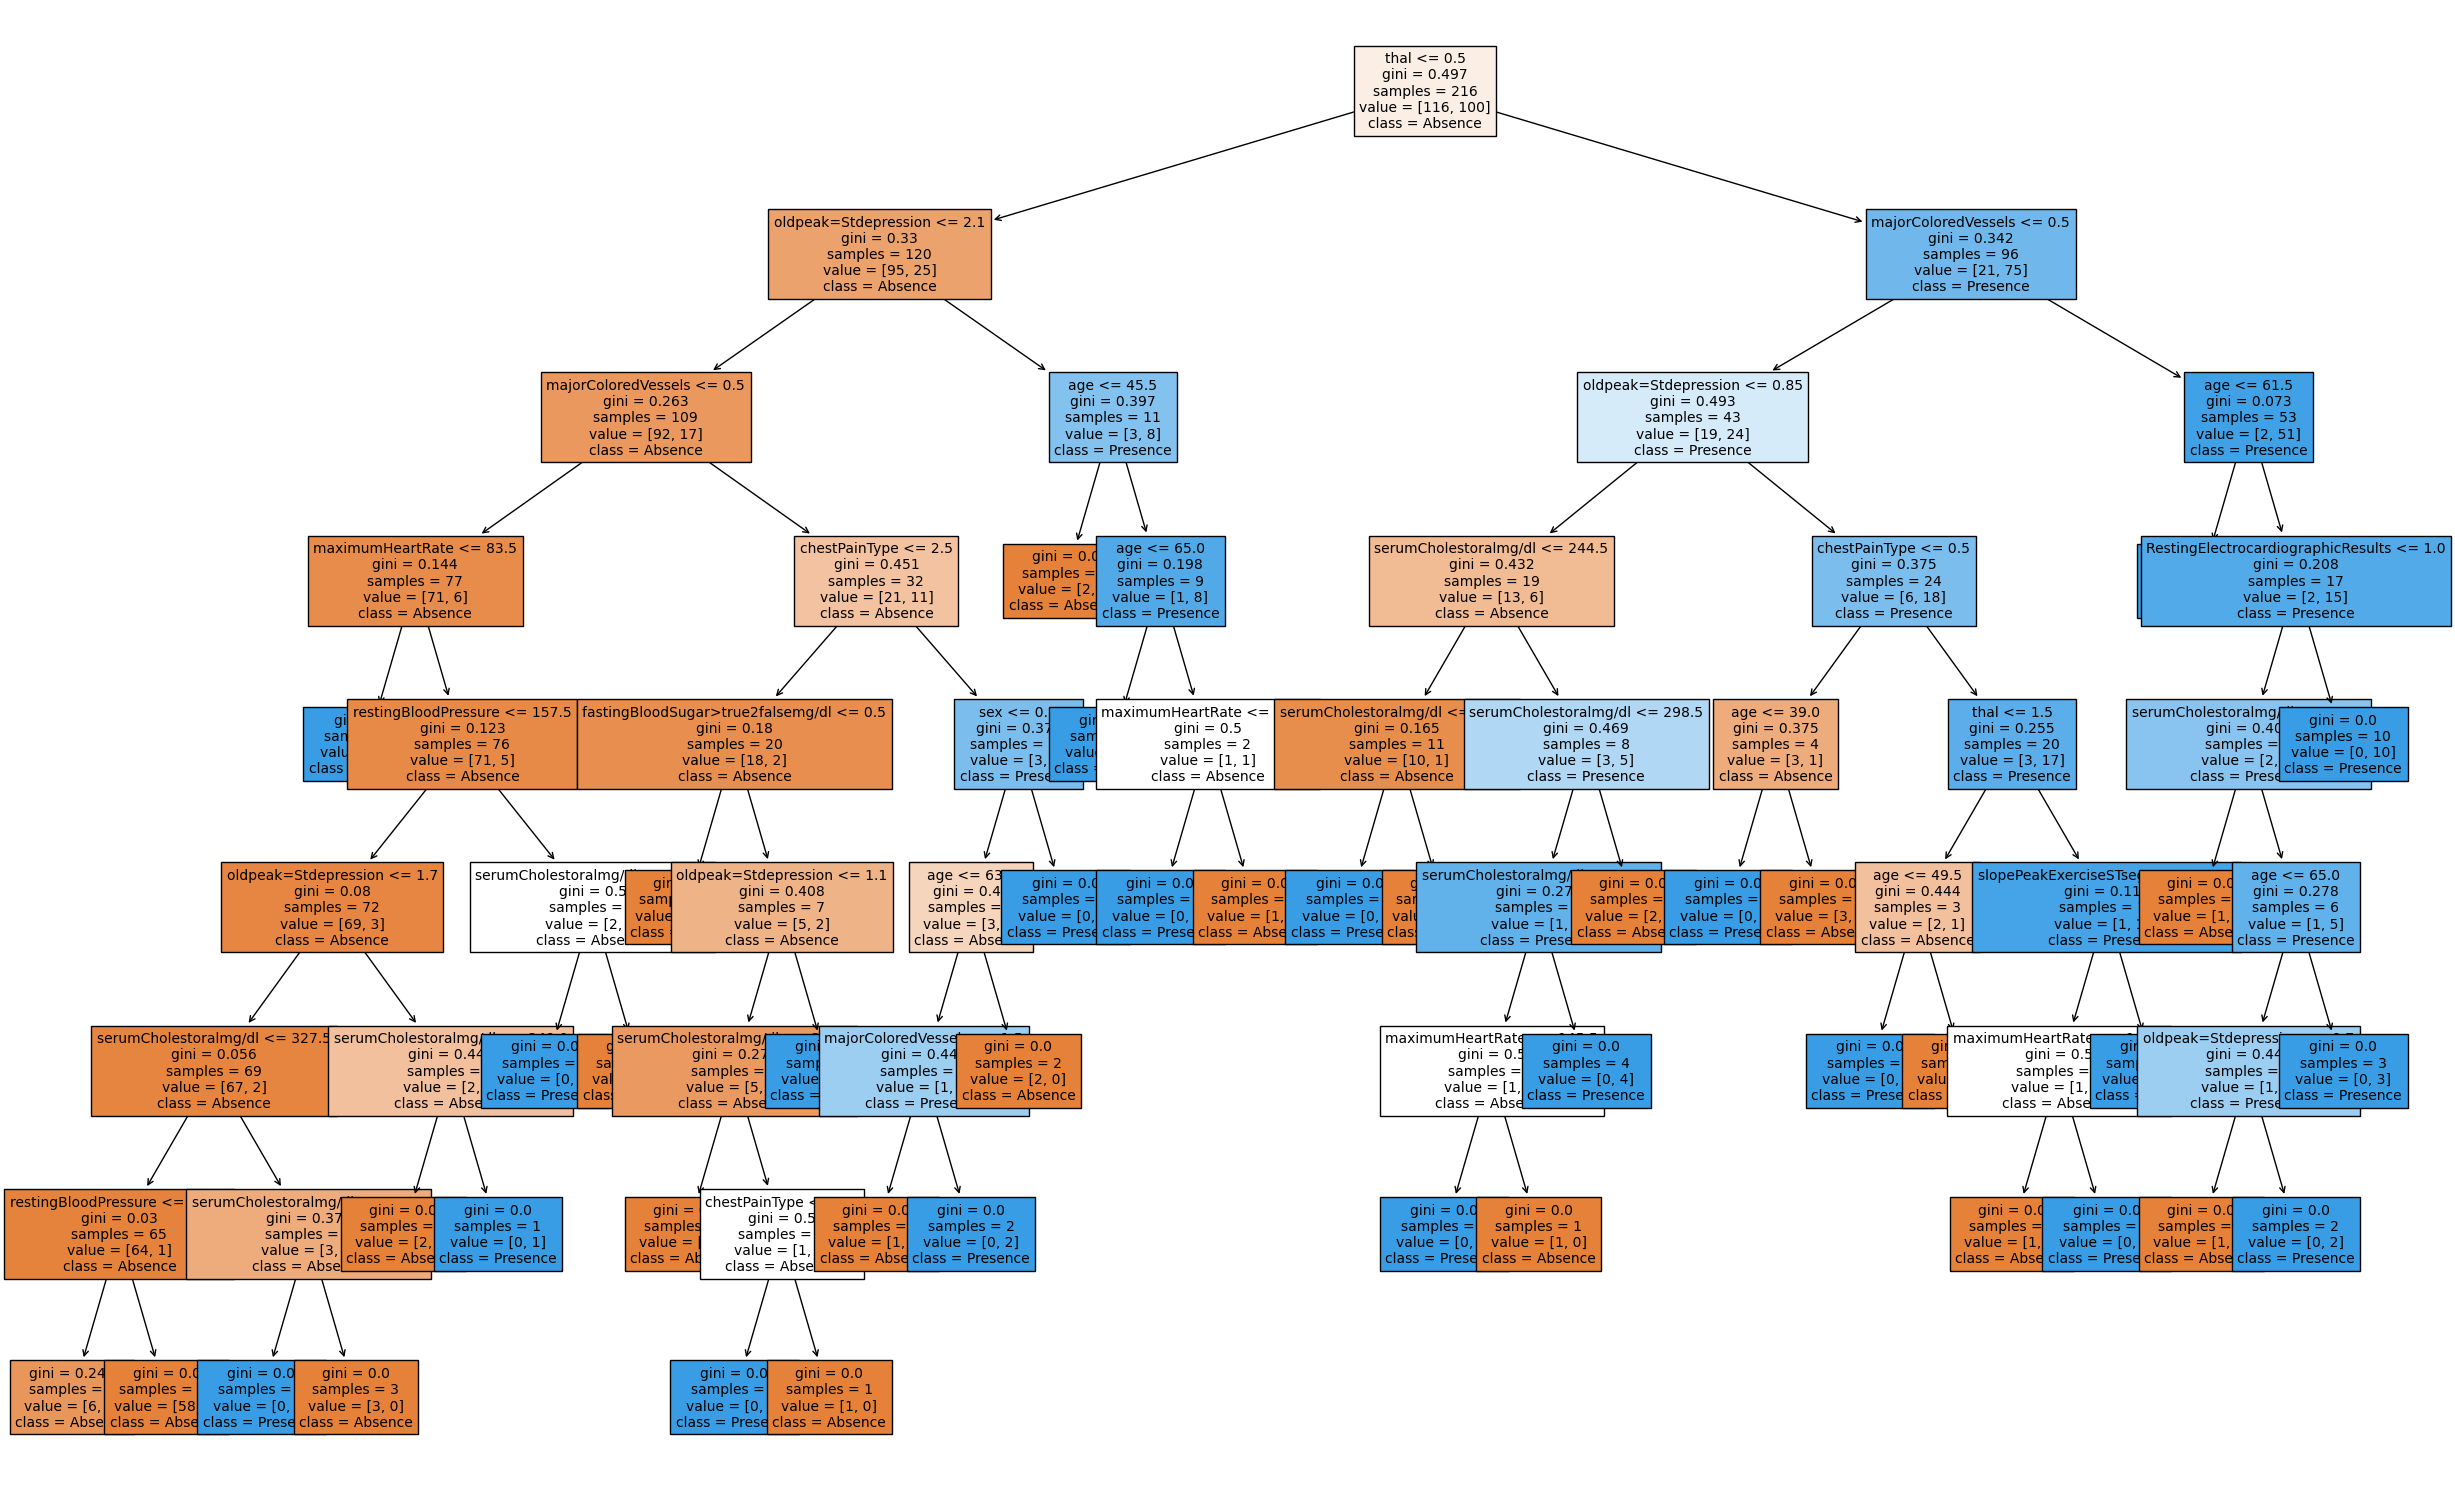

In [63]:
# plotting decision tree graph
plt.figure("Decision Tree" , figsize=[25,15])
tree.plot_tree(model_dt,fontsize=10,filled=True, feature_names = columns_names, class_names=['Absence','Presence'])
plt.tight_layout()
plt.show()

### Performance  Metrics

In [64]:
# finding FPR => False Positive Rate and TPR => True Positive Rate
fpr_dt, tpr_dt, threshold = roc_curve(y_test, model_dt.predict(x_test))
roc_auc_dt = auc(fpr_dt, tpr_dt)

In [65]:
# getting predicted values
predictions = model_dt.predict(x_test)


# Model Accuracy
print(model_dt.score(x_test,y_test))
y_actual_result = y_test[0]

0.7592592592592593


In [66]:
for i in range(len(predictions)):
    if(predictions[i]==1):
        y_actual_result = np.vstack((y_actual_result, y_test[i]))

### Recall 

In [67]:
# recall value => results equal to equal to 1
y_actual_result = y_actual_result.flatten()
count = 0
for result in y_actual_result:
    if(result == 1):
        count =count+1
print("true yes | predicted yes :")
print(count/float(len(y_actual_result)))

true yes | predicted yes :
0.625


### Area Under the Curve

<function matplotlib.pyplot.show(close=None, block=None)>

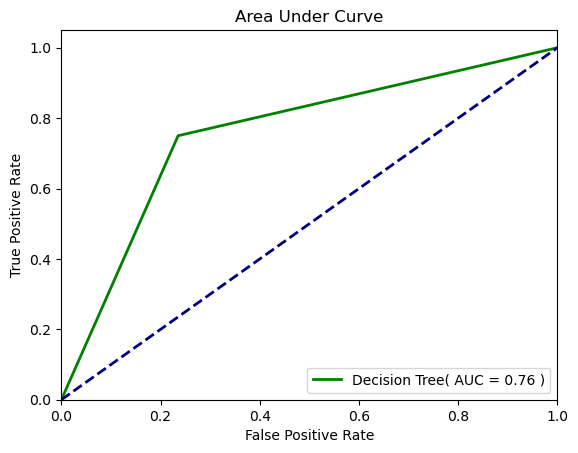

In [68]:
plt.figure(1)

plt.plot(fpr_dt, tpr_dt, color ='green',lw = 2, label='Decision Tree( AUC = %0.2f )'% roc_auc_dt)
plt.plot([0,1],[0,1], color='navy',lw = 2, linestyle='--' )

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc='lower right')
plt.show

### Confusion Matrix 

In [69]:
confusion_matrix(y_test, predictions)

array([[26,  8],
       [ 5, 15]], dtype=int64)

In [70]:
accuracy_score(y_test, predictions)

0.7592592592592593

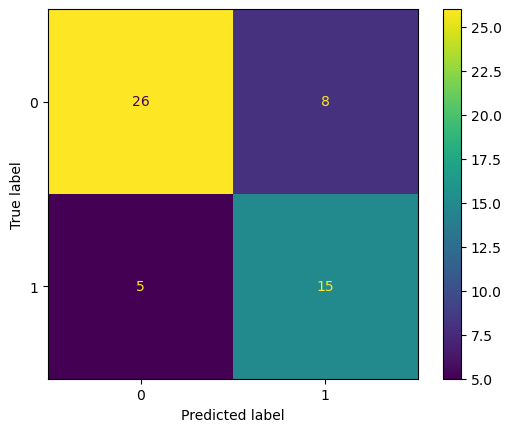

In [71]:
cm = confusion_matrix(y_test, predictions, labels=model_dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_dt.classes_)
disp.plot()

## Bayes Classification Method

In [72]:
encoded_df.groupby('HeartDisease').describe()

age                                                       sex  \
              count       mean       std   min   25%   50%   75%   max  count   
HeartDisease                                                                    
0             150.0  52.706667  9.509830  29.0  45.0  52.0  59.0  76.0  150.0   
1             120.0  56.591667  8.116273  35.0  52.0  58.0  62.0  77.0  120.0   

                        ... majorColoredVessels        thal            \
                  mean  ...                 75%  max  count      mean   
HeartDisease            ...                                             
0             0.553333  ...                 0.0  3.0  150.0  0.373333   
1             0.833333  ...                 2.0  3.0  120.0  1.383333   

                                                 
                   std  min  25%  50%  75%  max  
HeartDisease                                     
0             0.755709  0.0  0.0  0.0  0.0  2.0  
1             0.890504  0.0  0.0  2.0  2.0  2.0  

[2 rows x 104 columns]

In [73]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB(force_alpha=True)
bnb.fit(x_train, y_train)

y_pred_bnb = bnb.predict(x_test)

print("Accuracy of the BernoulliNB: ",accuracy_score(y_test,y_pred_bnb))

# getting accuray for train dataset
bnb_score_train = bnb.score(x_train,y_train)
print("training score: ", bnb_score_train)

# getting accuray for test dataset
bnb_score_test = bnb.score(x_test,y_test)
print("testing score: ", bnb_score_test)

Accuracy of the BernoulliNB:  0.7592592592592593
training score:  0.8240740740740741
testing score:  0.7592592592592593


In [74]:

from sklearn.naive_bayes import GaussianNB


gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred_gnb = gnb.predict(x_test)
print("Accuracy of the GaussianNB: ",accuracy_score(y_test,y_pred_gnb))

# getting accuray for train dataset
gnb_score_train = gnb.score(x_train,y_train)
print("training score: ", gnb_score_train)

# getting accuray for test dataset
gnb_score_test = gnb.score(x_test,y_test)
print("testing score: ", gnb_score_test)

Accuracy of the GaussianNB:  0.8518518518518519
training score:  0.8611111111111112
testing score:  0.8518518518518519


In [75]:
# getting predicted probabilities 
y_pred_prob_gnb = gnb.predict_proba(x_test)[:, 1]

### Performance Metrics

In [76]:
# finding FPR => False Positive Rate and TPR => True Positive Rate
fpr_dt, tpr_dt, threshold = roc_curve(y_test, gnb.predict(x_test))
roc_auc_dt = auc(fpr_dt, tpr_dt)

In [77]:
# getting predicted values
predictions = gnb.predict(x_test)


# Model Accuracy
print(gnb.score(x_test,y_test))
y_actual_result = y_test[0]

0.8518518518518519


In [78]:
for i in range(len(predictions)):
    if(predictions[i]==1):
        y_actual_result = np.vstack((y_actual_result, y_test[i]))

### Recall 

In [79]:
# recall value => results equal to equal to 1
y_actual_result = y_actual_result.flatten()
count = 0
for result in y_actual_result:
    if(result == 1):
        count =count+1
print("true yes | predicted yes :")
print(count/float(len(y_actual_result)))

true yes | predicted yes :
0.7894736842105263


### Area Under the Curve

<function matplotlib.pyplot.show(close=None, block=None)>

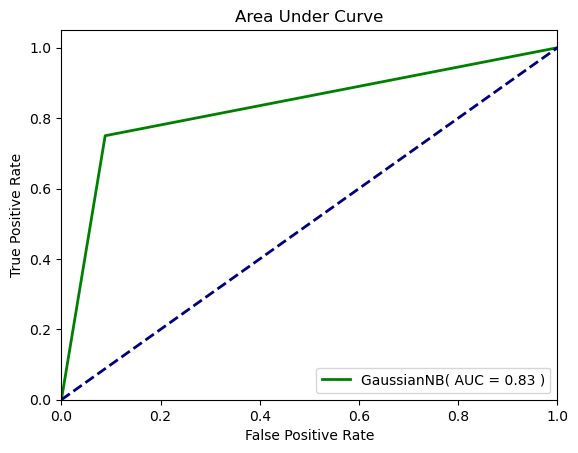

In [80]:
plt.figure(1)

plt.plot(fpr_dt, tpr_dt, color ='green',lw = 2, label='GaussianNB( AUC = %0.2f )'% roc_auc_dt)
plt.plot([0,1],[0,1], color='navy',lw = 2, linestyle='--' )

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc='lower right')
plt.show

### Confusion Matrix 

In [81]:
confusion_matrix(y_test, predictions)

array([[31,  3],
       [ 5, 15]], dtype=int64)

In [82]:
accuracy_score(y_test, predictions)

0.8518518518518519

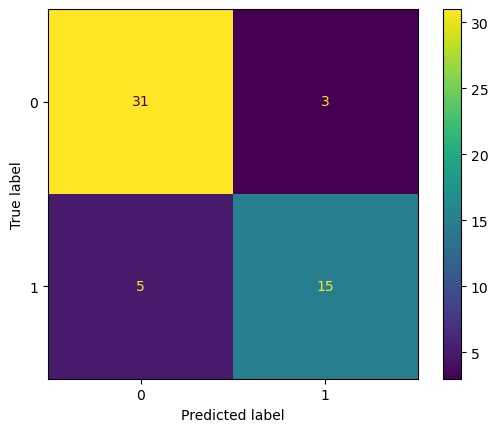

In [83]:
cm = confusion_matrix(y_test, predictions, labels=model_dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_dt.classes_)
disp.plot()